<a href="https://colab.research.google.com/github/Dennis-Farias/aulaAprendizadoDeMaquina/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Carrega o dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Cria o modelo de Support Vector Machine (SVM)
model = svm.SVC(kernel='linear', probability=True, verbose=True)

# Treina o modelo
model.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [5]:
# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Relatório das métricas do modelo
print("## Matriz de Confusão ##")
print(confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print("## Relatório de Métricas do Modelo ##")
print(report)

## Matriz de Confusão ##
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
## Relatório de Métricas do Modelo ##
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
# Gráfico dos hiperplanos separadores

X = iris.data[:, :2]
y = iris.target

model = svm.SVC(kernel='linear', probability=True, verbose=True)
model.fit(X, y)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [7]:
# Criar ambiente para os gráficos
x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

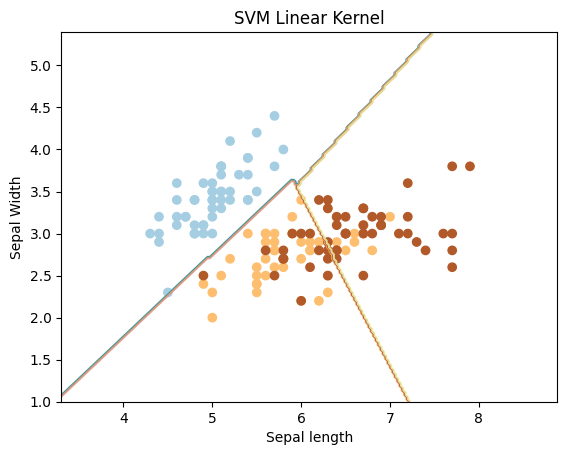

In [8]:
# Criando o Gráfico
plt.subplot(1,1,1)
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('SVM Linear Kernel')
plt.show()